### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([102,2918,2919,2920,3044,4289,4548,4884,4950,4952,4959,5158,5697,5701,5717,5931,6277,6416,6510,6568,6705,6725,6864,6884,7014,7052,7387,7804,8005,8006,8134,8665,8667,8691,8826,8988,8989,9085,9256,9825,9932,10043,10137,10303,10754,10764,10775,11115,11602,11749,11856,12103,12125,12127,12130,12131,12132,12136,12138,12144,12160,12191,12204,12236,12250,12272,12289,12297,12304,12346,12377,12379,12385,12398,12414,12424,12427,12430,12462,12463,12478,12493,12533,12557,12571,12611,12626,12627,12645,12659,12664,12667,12694,12696,12697,12718,12744,12794,12806,12846,12893,12979,12980,13062,13071,13073,13074,13082,13448,13449,13450,13626,13890,14374,15045,15206,15208,15226,15278,15279,15280,15281,15282,15283,15680,16182,16477,16493,16494,16521,16591,16831,17150,17415,17445,17897,17929,17931,18294,18298,18301,18303,18304,18305,18307,18309,18312,18319,18322,18324,18335,18339,18340,18342,18349,18352,18353,18359,18365,18366,18377,18378,18387,18388,18404,18481,18777,18879,18941,18943,18960,19178,19482,19579,19611,19899,19900,19901,19902,19903,19904,19905,19906,19907,19908,19909,19937,20305,20515,20624,20656,20657,20658,20659,20660,20661,20662,20663,20664,20665,20666,20667,20668,20669,20670,20671,20672,20673,20674,20693,20713,21445,22667,22669,22670,22779,23137,23298,23692,23693,23694,23752,23836,23837,23838,24124,24479,25086,25902,25996,26280,26401,26402,26403,26404,26405,26406,26407,26408,26681,26934,27547,27686,27749,27753,28398,28817,29027,29089,29220,29361,29468,29604,29605,29871,29872,29873,30420,30421,30523,30524,30525,30526,30527,30528,30529,30880,31057,31441,31917,32074,32177,32265,32266,32268,32320,32321,32322,32323,32324,32325,32326,32327,32341,32360,32482,32483,32484,32485,32486,32487,32488,32489,32490,32491,32492,32733,32765,32793,32840,32886,32887,32933,33305,33430,33734,34040,34244,34245,34283,34285,34289,34290,34291,34292,34297,34298,34299,34446,34519,34525,34584,34905,34923,34947,35013,35015,35033,35162,35181,35444,35447,35647,35658,36510,36527,36590,36635,36636,36668,36788,36807,37007,37032,37035,37255,37324,37354,37411,37436,37602,37831,38491,38494,38635,39062,39222,39334,39549,39830,40015,40298,40395,40439,40452,40581,40847,40939,40941,40942,41141,41443,41529,41533,42153,42256,42584,42755,42899,42946,43529,43530,43531,43532,43533,44098,44205,44206,44208,44263,44445,44596,44729,44757,44758,44759,44760,44761,44762,44763,44764,44765,44766,44767,44768,44934,45350,45412,45434,45478,45575,45604,45759,45810,46169,46172,46222,46653,47146,47403,47497,47498,47586,47628,47711,47712,47789,47810,47903,47979,47986,48415,48548,48589,48593,48951,49300,49530,49545,49958,49972,50319,50471,50637,51230,51367,51468,51729,51766,51791,51799,51915,51934,52394,52919,52920,52940,53280,53660,53756,53870,54367,54854,54939,54976,55008,55039,55260,55648,56063,56275,56412,57132,57600,57913,57961,58153,58236,58237,58502,58890,59272,59387,59459,59535,59978,60213,60530,60674,60819,60838,60854,61227,61461,61604,61778,61836,61849,61953,61983,62463,62647,62954,63200,63288,63299,63381,63530,63864,64076,64256,64314,64338,64382,64517,64550,64551,64552,64553,64555,64558,64559,64560,64861,65091,65556,65557,65560,65748,65809,65888,66166,66526,66527,67070,67071,67072,67073,67074,67120,67121,67761,68000,68277,68407,68734,68875,69199,69337,69338,69719,69866,69899,69928,69948,70496,70622,70732,70758,70997,71097,71746,71824,71837,72128,72809,72876,72877,72965,73145,73233,73458,73934,74689,74690,74692,74738,74750,74758,74786,74812,74813,74836,74971,75213,75590,75872,76125,76287,76339,76826,76827,76919,76920,77024,77112,77113,78468,78529,78749,78812,78984,79377,79378,79379,79380,79381,79382,79383,79384,79385,79386,79387,79388,79389,79390,79957,80279,80344,80412,80425,80581,81092,81159,82066,82094,82141,82172,82174,82181,82187,82205,82259,82299,82475,82479,82482,82483,82486,82490,82530,82659,82681,82684,82832,83578,83786,83903,83988,83989,83990,83991,83992,83993,83994,83995,83996,83997,83998,83999,84000,84001,84002,84003,84004,84005,84275,84388,84549,84550,84551,84795,85293,85294,85295,85400,85587,85739,85750,85775,86001,86003,86510,86643,86821,86822,86823,86824,86825,86826,86870,87016,87310,87336,87338,87344,87380,87401,87416,87481,88027,88117,88472,88493,88494,88549,88551,88771,88893,89155,89513,89625,89676,90465,91080,91232,91265,91274,91296,91297,91298,91299,91300,91301,91302,91303,91390,91499,92266,92723,93261,93300,93399,93633,93741,93750,93783,94008,94241,94319,94411,94575,94577,94578,94580,94581,94582,94583,94585,94586,94587,94588,94589,94590,94591,94592,94593,94594,94595,94596,94597,94599,94600,94601,94602,94603,94604,94605,94606,94607,94608,94609,94610,94611,94612,94614,94615,94616,94617,94618,94619,94620,94621,94622,94623,94624,94625,94626,94627,94628,94629,94630,94631,94632,94633,94635,94636,94637,94638,94639,94640,94641,94642,94644,94645,94646,94647,94716,95225,95226,95227,95228,95230,95231,95232,95233,95234,95235])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(818, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(334153,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

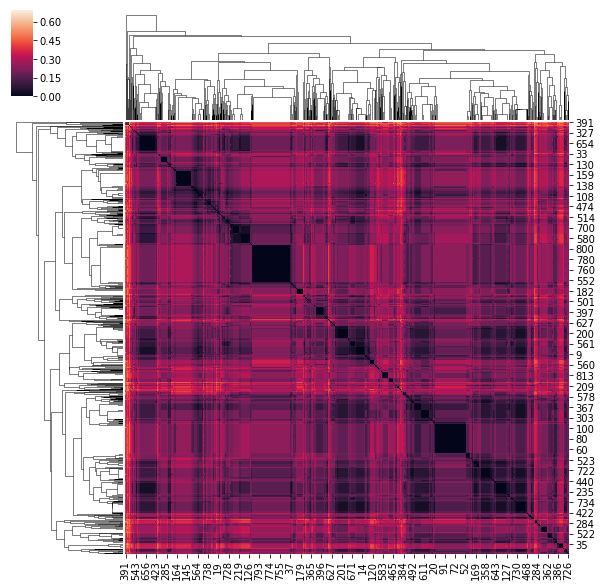

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

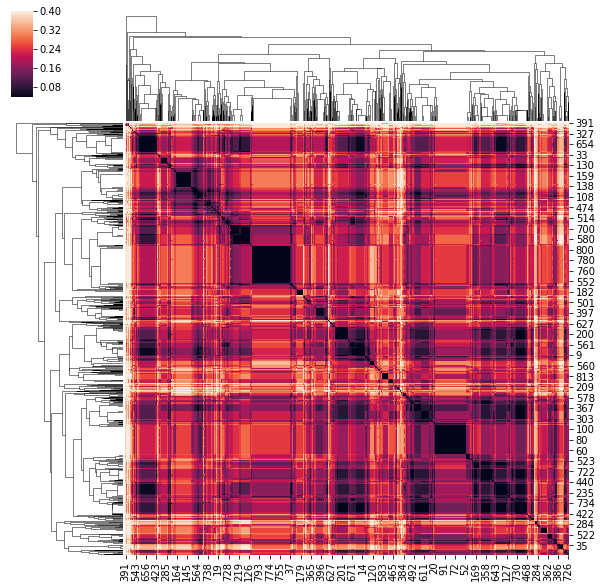

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

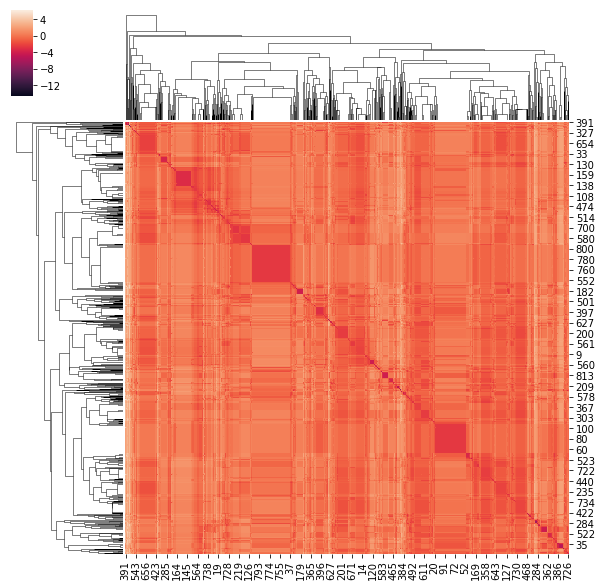

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

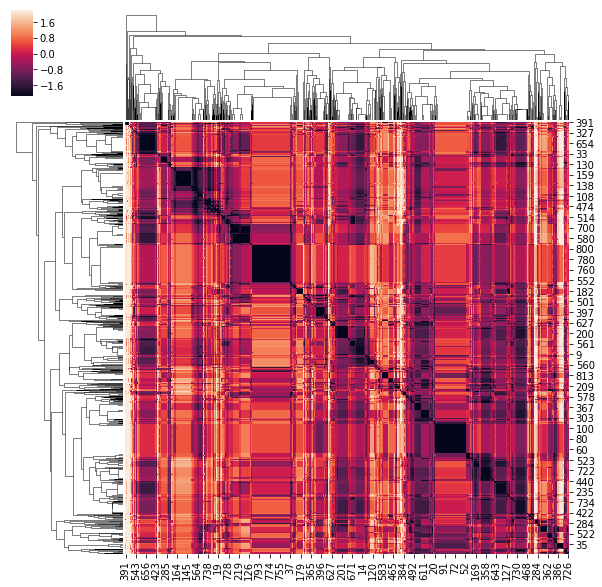

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)